In [1]:
from datetime import datetime
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2020-09-25 15:09:48.151817


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.chdir("/content/drive/My Drive/data_science/computer_vision/session9_assignment_final/EVA5_AI_Projects_new-master")

In [4]:
!pip install albumentations

In [5]:
import time
import torch
!pip install torchsummary
from data.data_loaders.base_data_loader import BaseDataLoader
from data.base_data_utils import get_data_loaders
from utils.misc_utils import get_device_type
from models.networks.resnet import ResNet18
from configs import basic_config
from utils.visualization_utils import plot_multigraph, plot_misclassified_images
from models.model_builder import build_model
from utils import logger_utils
from orchestrators.base_orchestrator import start_training
from orchestrators.base_orchestrator import display_classwise_accuracy
from torchsummary import summary
from torchvision.utils import make_grid, save_image
from models.gradcam.utils import visualize_cam
from models.gradcam.gradcam import GradCAM
from data.base_data_utils import sample_data

from models.networks.QuizDNN import Net

from data.data_transforms.base_data_transforms import UnNormalize

from models.gradcam.gen_gradcam import generate_grad_cam_grid
import warnings
warnings.filterwarnings('ignore')

In [6]:
logger = logger_utils.get_logger(__name__)

In [7]:
train_loader, test_loader = get_data_loaders(dataset_name='cifar10')


**** Started Loading data ****

Files already downloaded and verified
CUDA Available? True
Files already downloaded and verified
CUDA Available? True
CUDA Available? True

**** Ended Loading data ****



In [8]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

plane  ship   car plane


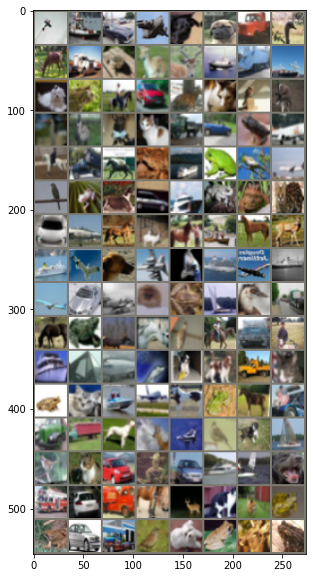

In [9]:
sample_data(train_loader, classes)

In [10]:
def print_summary(network,title):
  print(title)
  summary(network,input_size=(3,32,32))

In [11]:
device = get_device_type()
model = Net().to(device)
print_summary(model,'Network summary')

Network summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
            Conv2d-4           [-1, 32, 32, 32]              96
       BatchNorm2d-5           [-1, 32, 32, 32]              64
            Conv2d-6           [-1, 32, 32, 32]           9,216
              ReLU-7           [-1, 32, 32, 32]               0
       BatchNorm2d-8           [-1, 32, 32, 32]              64
            Conv2d-9           [-1, 32, 32, 32]              96
      BatchNorm2d-10           [-1, 32, 32, 32]              64
        MaxPool2d-11           [-1, 32, 16, 16]               0
           Conv2d-12           [-1, 64, 16, 16]          18,432
             ReLU-13           [-1, 64, 16, 16]               0
      BatchNorm2d-14   

In [12]:
EPOCHS = 40
device = get_device_type()
results = {}

models_dict = {'resnet18': {'model': model}
          }

lst_plottingJobs_val_acc = []
lst_plottingLegends_val_acc = []
lst_plottingJobs_loss = []
lst_plottingLegends_loss = []

In [13]:


## Training

results = start_training(EPOCHS, device, train_loader, test_loader, **models_dict)

  0%|          | 0/391 [00:00<?, ?it/s]


**** Started training ****


Model: resnet18

0 0
[EPOCH:0]


Loss=1.0236867666244507 Batch_id=390 Current_train_batch_accuracy=48.37: 100%|██████████| 391/391 [00:16<00:00, 23.01it/s]



Train set: Average loss: 1.1430, Accuracy: 29337/50000 (58.67%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1530, Accuracy: 5905/10000 (59.05%)

best_test_accuracy 59.05
[EPOCH:1]


Loss=0.828101634979248 Batch_id=390 Current_train_batch_accuracy=65.90: 100%|██████████| 391/391 [00:17<00:00, 22.83it/s]



Train set: Average loss: 0.8603, Accuracy: 35085/50000 (70.17%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9805, Accuracy: 6726/10000 (67.26%)

best_test_accuracy 67.26
[EPOCH:2]


Loss=0.71426922082901 Batch_id=390 Current_train_batch_accuracy=73.12: 100%|██████████| 391/391 [00:16<00:00, 23.05it/s]



Train set: Average loss: 0.6726, Accuracy: 38371/50000 (76.74%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8077, Accuracy: 7290/10000 (72.90%)

best_test_accuracy 72.9
[EPOCH:3]


Loss=0.7180855870246887 Batch_id=390 Current_train_batch_accuracy=77.13: 100%|██████████| 391/391 [00:17<00:00, 22.74it/s]



Train set: Average loss: 0.6359, Accuracy: 38945/50000 (77.89%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7328, Accuracy: 7562/10000 (75.62%)

best_test_accuracy 75.62
[EPOCH:4]


Loss=0.6244146823883057 Batch_id=390 Current_train_batch_accuracy=79.27: 100%|██████████| 391/391 [00:17<00:00, 22.62it/s]



Train set: Average loss: 0.5548, Accuracy: 40328/50000 (80.66%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6304, Accuracy: 7871/10000 (78.71%)

best_test_accuracy 78.71
[EPOCH:5]


Loss=0.8493567705154419 Batch_id=390 Current_train_batch_accuracy=81.42: 100%|██████████| 391/391 [00:17<00:00, 22.92it/s]



Train set: Average loss: 0.5053, Accuracy: 41212/50000 (82.42%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6454, Accuracy: 7888/10000 (78.88%)

best_test_accuracy 78.88
[EPOCH:6]


Loss=0.5962494611740112 Batch_id=390 Current_train_batch_accuracy=82.67: 100%|██████████| 391/391 [00:17<00:00, 22.79it/s]



Train set: Average loss: 0.4600, Accuracy: 42003/50000 (84.01%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6236, Accuracy: 7981/10000 (79.81%)

best_test_accuracy 79.81
[EPOCH:7]


Loss=0.466696172952652 Batch_id=390 Current_train_batch_accuracy=83.73: 100%|██████████| 391/391 [00:17<00:00, 22.68it/s]



Train set: Average loss: 0.4138, Accuracy: 42900/50000 (85.80%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5361, Accuracy: 8193/10000 (81.93%)

best_test_accuracy 81.93
[EPOCH:8]


Loss=0.45056405663490295 Batch_id=390 Current_train_batch_accuracy=84.69: 100%|██████████| 391/391 [00:17<00:00, 22.72it/s]



Train set: Average loss: 0.3882, Accuracy: 43262/50000 (86.52%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5913, Accuracy: 8064/10000 (80.64%)

best_test_accuracy 81.93
[EPOCH:9]


Loss=0.46966442465782166 Batch_id=390 Current_train_batch_accuracy=85.83: 100%|██████████| 391/391 [00:17<00:00, 22.77it/s]



Train set: Average loss: 0.4408, Accuracy: 42252/50000 (84.50%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5858, Accuracy: 8058/10000 (80.58%)

best_test_accuracy 81.93
[EPOCH:10]


Loss=0.38404983282089233 Batch_id=390 Current_train_batch_accuracy=86.47: 100%|██████████| 391/391 [00:17<00:00, 22.63it/s]



Train set: Average loss: 0.3843, Accuracy: 43305/50000 (86.61%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5172, Accuracy: 8291/10000 (82.91%)

best_test_accuracy 82.91
[EPOCH:11]


Loss=0.3389877676963806 Batch_id=390 Current_train_batch_accuracy=87.27: 100%|██████████| 391/391 [00:17<00:00, 22.67it/s]



Train set: Average loss: 0.3469, Accuracy: 44037/50000 (88.07%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5158, Accuracy: 8311/10000 (83.11%)

best_test_accuracy 83.11
[EPOCH:12]


Loss=0.22530333697795868 Batch_id=390 Current_train_batch_accuracy=87.76: 100%|██████████| 391/391 [00:17<00:00, 22.86it/s]



Train set: Average loss: 0.3142, Accuracy: 44545/50000 (89.09%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5139, Accuracy: 8352/10000 (83.52%)

best_test_accuracy 83.52
[EPOCH:13]


Loss=0.28796952962875366 Batch_id=390 Current_train_batch_accuracy=88.06: 100%|██████████| 391/391 [00:17<00:00, 22.92it/s]



Train set: Average loss: 0.3116, Accuracy: 44524/50000 (89.05%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4984, Accuracy: 8351/10000 (83.51%)

best_test_accuracy 83.52
[EPOCH:14]


Loss=0.30891162157058716 Batch_id=390 Current_train_batch_accuracy=88.64: 100%|██████████| 391/391 [00:17<00:00, 22.51it/s]



Train set: Average loss: 0.3004, Accuracy: 44801/50000 (89.60%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5518, Accuracy: 8285/10000 (82.85%)

best_test_accuracy 83.52
[EPOCH:15]


Loss=0.36740967631340027 Batch_id=390 Current_train_batch_accuracy=88.84: 100%|██████████| 391/391 [00:17<00:00, 22.65it/s]



Train set: Average loss: 0.2867, Accuracy: 44989/50000 (89.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4772, Accuracy: 8423/10000 (84.23%)

best_test_accuracy 84.23
[EPOCH:16]


Loss=0.5595865845680237 Batch_id=390 Current_train_batch_accuracy=89.34: 100%|██████████| 391/391 [00:17<00:00, 22.78it/s]



Train set: Average loss: 0.2678, Accuracy: 45328/50000 (90.66%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5148, Accuracy: 8355/10000 (83.55%)

best_test_accuracy 84.23
[EPOCH:17]


Loss=0.27046626806259155 Batch_id=390 Current_train_batch_accuracy=89.95: 100%|██████████| 391/391 [00:17<00:00, 22.74it/s]



Train set: Average loss: 0.2689, Accuracy: 45226/50000 (90.45%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5153, Accuracy: 8396/10000 (83.96%)

best_test_accuracy 84.23
[EPOCH:18]


Loss=0.34058353304862976 Batch_id=390 Current_train_batch_accuracy=90.43: 100%|██████████| 391/391 [00:17<00:00, 22.49it/s]



Train set: Average loss: 0.2451, Accuracy: 45705/50000 (91.41%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5422, Accuracy: 8330/10000 (83.30%)

best_test_accuracy 84.23
[EPOCH:19]


Loss=0.3383825123310089 Batch_id=390 Current_train_batch_accuracy=90.76: 100%|██████████| 391/391 [00:17<00:00, 22.54it/s]



Train set: Average loss: 0.2495, Accuracy: 45651/50000 (91.30%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4987, Accuracy: 8449/10000 (84.49%)

best_test_accuracy 84.49
[EPOCH:20]


Loss=0.15144410729408264 Batch_id=390 Current_train_batch_accuracy=91.10: 100%|██████████| 391/391 [00:17<00:00, 22.77it/s]



Train set: Average loss: 0.2367, Accuracy: 45823/50000 (91.65%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5130, Accuracy: 8423/10000 (84.23%)

best_test_accuracy 84.49
[EPOCH:21]


Loss=0.22019092738628387 Batch_id=390 Current_train_batch_accuracy=90.74: 100%|██████████| 391/391 [00:17<00:00, 22.64it/s]



Train set: Average loss: 0.2159, Accuracy: 46214/50000 (92.43%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4544, Accuracy: 8575/10000 (85.75%)

best_test_accuracy 85.75
[EPOCH:22]


Loss=0.31006303429603577 Batch_id=390 Current_train_batch_accuracy=91.73: 100%|██████████| 391/391 [00:17<00:00, 22.66it/s]



Train set: Average loss: 0.2077, Accuracy: 46397/50000 (92.79%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5129, Accuracy: 8467/10000 (84.67%)

best_test_accuracy 85.75
[EPOCH:23]


Loss=0.1936172991991043 Batch_id=390 Current_train_batch_accuracy=91.60: 100%|██████████| 391/391 [00:17<00:00, 22.87it/s]



Train set: Average loss: 0.2072, Accuracy: 46317/50000 (92.63%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5109, Accuracy: 8447/10000 (84.47%)

best_test_accuracy 85.75
[EPOCH:24]


Loss=0.3257419168949127 Batch_id=390 Current_train_batch_accuracy=91.96: 100%|██████████| 391/391 [00:17<00:00, 22.56it/s]



Train set: Average loss: 0.2009, Accuracy: 46473/50000 (92.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4854, Accuracy: 8496/10000 (84.96%)

best_test_accuracy 85.75
[EPOCH:25]


Loss=0.09017229080200195 Batch_id=390 Current_train_batch_accuracy=92.29: 100%|██████████| 391/391 [00:17<00:00, 22.60it/s]



Train set: Average loss: 0.1925, Accuracy: 46549/50000 (93.10%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5022, Accuracy: 8502/10000 (85.02%)

best_test_accuracy 85.75
[EPOCH:26]


Loss=0.18757759034633636 Batch_id=390 Current_train_batch_accuracy=92.52: 100%|██████████| 391/391 [00:16<00:00, 23.09it/s]



Train set: Average loss: 0.1850, Accuracy: 46797/50000 (93.59%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5075, Accuracy: 8543/10000 (85.43%)

best_test_accuracy 85.75
[EPOCH:27]


Loss=0.25192850828170776 Batch_id=390 Current_train_batch_accuracy=92.72: 100%|██████████| 391/391 [00:17<00:00, 22.95it/s]



Train set: Average loss: 0.1732, Accuracy: 46918/50000 (93.84%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4619, Accuracy: 8572/10000 (85.72%)

best_test_accuracy 85.75
[EPOCH:28]


Loss=0.24306443333625793 Batch_id=390 Current_train_batch_accuracy=92.80: 100%|██████████| 391/391 [00:17<00:00, 22.83it/s]



Train set: Average loss: 0.1623, Accuracy: 47189/50000 (94.38%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4726, Accuracy: 8564/10000 (85.64%)

best_test_accuracy 85.75
[EPOCH:29]


Loss=0.15532922744750977 Batch_id=390 Current_train_batch_accuracy=93.06: 100%|██████████| 391/391 [00:17<00:00, 22.79it/s]



Train set: Average loss: 0.1656, Accuracy: 47090/50000 (94.18%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4647, Accuracy: 8610/10000 (86.10%)

best_test_accuracy 86.1
[EPOCH:30]


Loss=0.3617914319038391 Batch_id=390 Current_train_batch_accuracy=93.36: 100%|██████████| 391/391 [00:17<00:00, 23.00it/s]



Train set: Average loss: 0.1669, Accuracy: 47059/50000 (94.12%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5231, Accuracy: 8511/10000 (85.11%)

best_test_accuracy 86.1
[EPOCH:31]


Loss=0.21868574619293213 Batch_id=390 Current_train_batch_accuracy=93.31: 100%|██████████| 391/391 [00:17<00:00, 22.70it/s]



Train set: Average loss: 0.1567, Accuracy: 47289/50000 (94.58%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4781, Accuracy: 8600/10000 (86.00%)

best_test_accuracy 86.1
[EPOCH:32]


Loss=0.17330725491046906 Batch_id=390 Current_train_batch_accuracy=93.37: 100%|██████████| 391/391 [00:17<00:00, 22.91it/s]



Train set: Average loss: 0.1567, Accuracy: 47253/50000 (94.51%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4889, Accuracy: 8594/10000 (85.94%)

best_test_accuracy 86.1
[EPOCH:33]


Loss=0.1686033308506012 Batch_id=390 Current_train_batch_accuracy=93.59: 100%|██████████| 391/391 [00:17<00:00, 22.75it/s]



Train set: Average loss: 0.1437, Accuracy: 47467/50000 (94.93%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4758, Accuracy: 8668/10000 (86.68%)

best_test_accuracy 86.68
[EPOCH:34]


Loss=0.17699182033538818 Batch_id=390 Current_train_batch_accuracy=93.77: 100%|██████████| 391/391 [00:17<00:00, 22.73it/s]



Train set: Average loss: 0.1425, Accuracy: 47462/50000 (94.92%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4744, Accuracy: 8640/10000 (86.40%)

best_test_accuracy 86.68
[EPOCH:35]


Loss=0.08913539350032806 Batch_id=390 Current_train_batch_accuracy=93.98: 100%|██████████| 391/391 [00:17<00:00, 22.53it/s]



Train set: Average loss: 0.1561, Accuracy: 47250/50000 (94.50%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4901, Accuracy: 8573/10000 (85.73%)

best_test_accuracy 86.68
[EPOCH:36]


Loss=0.19148391485214233 Batch_id=390 Current_train_batch_accuracy=94.12: 100%|██████████| 391/391 [00:17<00:00, 22.78it/s]



Train set: Average loss: 0.1555, Accuracy: 47274/50000 (94.55%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5107, Accuracy: 8533/10000 (85.33%)

best_test_accuracy 86.68
[EPOCH:37]


Loss=0.24585893750190735 Batch_id=390 Current_train_batch_accuracy=94.33: 100%|██████████| 391/391 [00:16<00:00, 23.10it/s]



Train set: Average loss: 0.1418, Accuracy: 47522/50000 (95.04%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5337, Accuracy: 8567/10000 (85.67%)

best_test_accuracy 86.68
[EPOCH:38]


Loss=0.24373996257781982 Batch_id=390 Current_train_batch_accuracy=94.61: 100%|██████████| 391/391 [00:16<00:00, 23.20it/s]



Train set: Average loss: 0.1381, Accuracy: 47588/50000 (95.18%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5206, Accuracy: 8550/10000 (85.50%)

best_test_accuracy 86.68
[EPOCH:39]


Loss=0.3217896819114685 Batch_id=390 Current_train_batch_accuracy=94.45: 100%|██████████| 391/391 [00:17<00:00, 22.99it/s]



Train set: Average loss: 0.1251, Accuracy: 47805/50000 (95.61%)


Test set: Average loss: 0.4929, Accuracy: 8630/10000 (86.30%)

best_test_accuracy 86.68

results : {'resnet18': [[58.674, 70.17, 76.742, 77.89, 80.656, 82.424, 84.006, 85.8, 86.524, 84.504, 86.61, 88.074, 89.09, 89.048, 89.602, 89.978, 90.656, 90.452, 91.41, 91.302, 91.646, 92.428, 92.794, 92.634, 92.946, 93.098, 93.594, 93.836, 94.378, 94.18, 94.118, 94.578, 94.506, 94.934, 94.924, 94.5, 94.548, 95.044, 95.176, 95.61], [1.1430441081237792, 0.8602857751464844, 0.6725723317718506, 0.635872583770752, 0.5548274133300781, 0.5052966254425049, 0.45997873542785644, 0.4137961280822754, 0.3882261028289795, 0.44079781784057614, 0.38426809120178224, 0.3469225799560547, 0.3142092049026489, 0.3115685565185547, 0.30035423065185546, 0.2867357959747314, 0.26775465787887576, 0.26890506786346435, 0.24506248691558838, 0.24945183204650878, 0.23673809577941896, 0.2158845496940613, 0.20768556480407716, 0.2072098798561096, 0.20093494462966918

In [14]:
for model_type in results:
  lst_plottingJobs_val_acc.append(results[model_type][2])
  lst_plottingLegends_val_acc.append(model_type)
  lst_plottingJobs_loss.append(results[model_type][3])
  lst_plottingLegends_loss.append(model_type)


**** Started Plotting multigraph ****



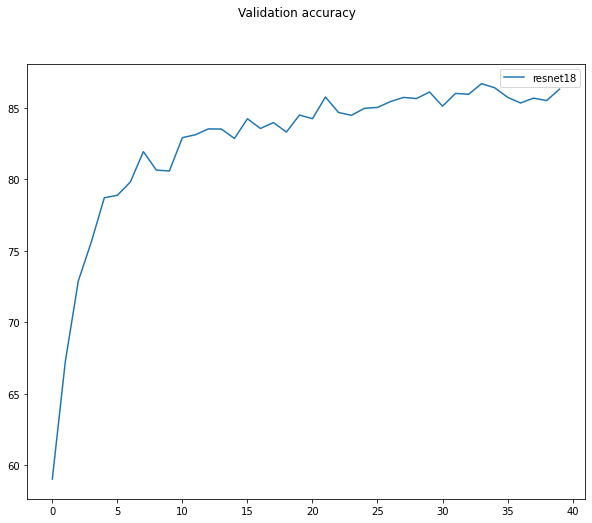


**** Ended Plotting multigraph ****



In [15]:
plot_multigraph(lst_plottingJobs_val_acc,lst_plottingLegends_val_acc,title="Validation accuracy")


**** Started Plotting multigraph ****



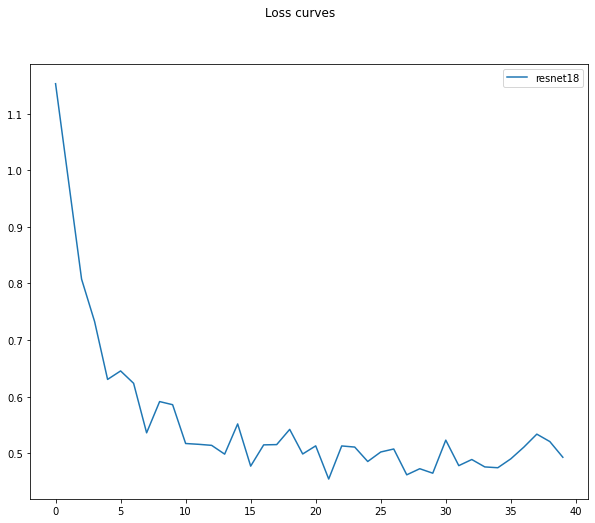


**** Ended Plotting multigraph ****



In [16]:
plot_multigraph(lst_plottingJobs_loss,lst_plottingLegends_loss,title="Loss curves")

In [20]:
display_classwise_accuracy(test_loader,device,model,classes)

Accuracy of plane : 95.83333333333333
Accuracy of car : 96.875
Accuracy of bird : 66.66666666666667
Accuracy of cat : 67.74193548387096
Accuracy of deer : 96.29629629629629
Accuracy of dog : 68.96551724137932
Accuracy of frog : 100.0
Accuracy of horse : 95.1219512195122
Accuracy of ship : 91.17647058823529
Accuracy of truck : 83.78378378378379
